In [246]:
import pulp as plp # linear optim problems
import cvxpy as cp # convex optim problems
import numpy as np
import matplotlib.pyplot as plt
import itertools

## any simple linear problem bounded

In [11]:
x1 = plp.LpVariable("x1",lowBound= 0, cat='Continuous')
x2 = plp.LpVariable("x2",lowBound= 0, cat='Continuous')

prob = plp.LpProblem("min x1+2x2", plp.LpMinimize)
prob += x1 + x2 # objective
prob += x1 + 2*x2 >= 6
prob += 2*x1 + x2 <= 6

prob.solve()
print("Status:", plp.LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)
print("objective value = ", plp.value(prob.objective))

Status: Optimal
x1 = 0.0
x2 = 3.0
objective value =  3.0


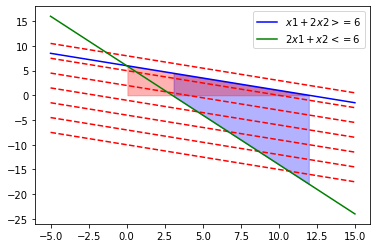

In [104]:

#I hold x a line while defining new values for each y
x1 = np.linspace(start=-5,stop =15, num=100)
x2_1 = 6-x1*1/2
x2_2 = 6-x1*2
x2 = 0 * x1
#y3=1-x*0
#1*x[1] + 1*x[2] <= 6
#y4=6-x

for i in range(-10,10,3):
    x20 = i -x1/2
    plt.plot(x1,x20, color= 'red', ls = '--')

plt.plot(x1,x2_1,label=r'$x1+2x2>=6$', color= 'blue')
plt.plot(x1,x2_2,label=r'$2x1+x2<=6$', color = 'green')
#plt.plot(x1,x2, color = 'violet')
#plt.axhline(0, color='0', ls = '--')        #y2 <  5
#plt.axvline(3, color='0', ls = '--') #x  >= 1 
#plt.plot(x,y3,'b--')  #y3 >= 1
plt.fill_between(x1, x2_1, x2_2,
                 where = (x1>=0) & (x2_1>=0) & (x2_2<=0) , 
                 color='blue', alpha=0.3)
plt.fill_between(x1, x2_1,  x2,
                 where = (x1>=0) & (x2_1>=0) &  (x2>=0), 
                 color='red', alpha=0.3)

#plt.fill_between(x1,  x2, x2_2,
#                 where = (x1>=0) &  (x2>=0) & (x2_2<=0), 
#                 color='yellow', alpha=0.3) # por que no funciona esta?

plt.legend(loc="upper right")

plt.show()

## 2.9 Personnel scheduling (continuous linear program)

In [118]:
demand = [110,80,150,30,70,160,120]


shift_1 = plp.LpVariable("shift_1",lowBound= 0, cat='Continuous')
shift_2 = plp.LpVariable("shift_2",lowBound= 0, cat='Continuous')
shift_3 = plp.LpVariable("shift_3",lowBound= 0, cat='Continuous')
shift_4 = plp.LpVariable("shift_4",lowBound= 0, cat='Continuous')
shift_5 = plp.LpVariable("shift_5",lowBound= 0, cat='Continuous')
shift_6 = plp.LpVariable("shift_6",lowBound= 0, cat='Continuous')
shift_7 = plp.LpVariable("shift_7",lowBound= 0, cat='Continuous')



prob = plp.LpProblem("min shift_1+ shift_2 +..+ shift_7", plp.LpMinimize)
prob += shift_1 + shift_2 + shift_3 + shift_4 + shift_5 + shift_6 + shift_7 # objective

prob += shift_1 + shift_4 + shift_5 + shift_6 + shift_7  >= demand[0]
prob += shift_1 + shift_2 + shift_5 + shift_6 + shift_7  >= demand[1]
prob += shift_1 + shift_2 + shift_3 + shift_6 + shift_7  >= demand[2]
prob += shift_1 + shift_2 + shift_3 + shift_4 + shift_7  >= demand[3]
prob += shift_1 + shift_2 + shift_3 + shift_4 + shift_5  >= demand[4]
prob += shift_2 + shift_3 + shift_4 + shift_5 + shift_6  >= demand[5]
prob += shift_3 + shift_4 + shift_5 + shift_6 + shift_7  >= demand[6]


prob.solve()
print("Status:", plp.LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)
print("objective value = ", plp.value(prob.objective))


Status: Optimal
shift_1 = 3.3333333
shift_2 = 40.0
shift_3 = 13.333333
shift_4 = 0.0
shift_5 = 13.333333
shift_6 = 93.333333
shift_7 = 0.0
objective value =  163.3333323


## same problem with loops (using LpVariable.dicts and  lpSum)

In [231]:
variables = {}
variables['shifts'] = plp.LpVariable.dicts('shift', indexs=range(1,8,1), lowBound=0, 
                                            cat='Continuous')

prob = plp.LpProblem("min shift_1+ shift_2 +..+ shift_7", plp.LpMinimize)
prob += plp.lpSum([variables['shifts'][i]  for i in range(1,8,1)]) #objective

In [232]:
variables['shifts'] 

{1: shift_1,
 2: shift_2,
 3: shift_3,
 4: shift_4,
 5: shift_5,
 6: shift_6,
 7: shift_7}

In [233]:
# to define the constraints
add = [variables['shifts'][i] for i in range(1,8,1)]
constraints = {}
for day_shift in range(1,8,1):
    #print(day_shift)
    mod_7 = day_shift%7
    #print(mod_7)
    if (mod_7 <= 5) and (mod_7 >= 1):
        extract =  [variables['shifts'][day_shift+j] for j in range(1,3,1)]       
        constraints['c'+ str(day_shift)] =  extract   
    if (mod_7 == 6):
        extract =  [variables['shifts'][j] for j in [7,1]]       
        constraints['c'+ str(day_shift)] =  extract   
    if (mod_7 == 0):
        extract =  [variables['shifts'][j] for j in [1,2]]       
        constraints['c'+ str(day_shift)] =  extract   

for i in range(1,8,1):
    prob += plp.lpSum(add) -  plp.lpSum(constraints['c'+str(i)]) >= demand[i-1]

In [234]:
constraints

{'c1': [shift_2, shift_3],
 'c2': [shift_3, shift_4],
 'c3': [shift_4, shift_5],
 'c4': [shift_5, shift_6],
 'c5': [shift_6, shift_7],
 'c6': [shift_7, shift_1],
 'c7': [shift_1, shift_2]}

In [200]:

prob.solve()
print("Status:", plp.LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)
print("objective value = ", plp.value(prob.objective))


Status: Optimal
shift_1 = 3.3333333
shift_2 = 40.0
shift_3 = 13.333333
shift_4 = 0.0
shift_5 = 13.333333
shift_6 = 93.333333
shift_7 = 0.0
objective value =  163.3333323


In [201]:
for day_shift in range(1,8,1):
    c = np.sum(res)- np.sum([s.varValue for s in constraints['c'+str(day_shift)]])
    print('result: ' + str(c) + ' - demand:' + str(demand[day_shift-1]))

result: 110.666667 - demand:110
result: 150.666667 - demand:80
result: 150.666667 - demand:150
result: 57.33333400000001 - demand:30
result: 70.666667 - demand:70
result: 160.6666667 - demand:160
result: 120.66666670000001 - demand:120


## 3.12 Personnel scheduling (integer linear program)

In [202]:
variables = {}
variables['shifts'] = plp.LpVariable.dicts('shift', indexs=range(1,8,1), lowBound=0, 
                                            cat='Integer')

prob = plp.LpProblem("min shift_1+ shift_2 +..+ shift_7", plp.LpMinimize)
prob += plp.lpSum([variables['shifts'][i]  for i in range(1,8,1)])

In [203]:
# to define the constraints
add = [variables['shifts'][i] for i in range(1,8,1)]
constraints = {}
for day_shift in range(1,8,1):
    #print(day_shift)
    mod_7 = day_shift%7
    #print(mod_7)
    if (mod_7 <= 5) and (mod_7 >= 1):
        extract =  [variables['shifts'][day_shift+j] for j in range(1,3,1)]       
        constraints['c'+ str(day_shift)] =  extract   
    if (mod_7 == 6):
        extract =  [variables['shifts'][j] for j in [7,1]]       
        constraints['c'+ str(day_shift)] =  extract   
    if (mod_7 == 0):
        extract =  [variables['shifts'][j] for j in [1,2]]       
        constraints['c'+ str(day_shift)] =  extract   

for i in range(1,8,1):
    prob += plp.lpSum(add) -  plp.lpSum(constraints['c'+str(i)]) >= demand[i-1]

In [204]:
constraints

{'c1': [shift_2, shift_3],
 'c2': [shift_3, shift_4],
 'c3': [shift_4, shift_5],
 'c4': [shift_5, shift_6],
 'c5': [shift_6, shift_7],
 'c6': [shift_7, shift_1],
 'c7': [shift_1, shift_2]}

In [205]:

prob.solve()
print("Status:", plp.LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)
print("objective value = ", plp.value(prob.objective))

Status: Optimal
shift_1 = 4.0
shift_2 = 40.0
shift_3 = 12.0
shift_4 = 0.0
shift_5 = 14.0
shift_6 = 94.0
shift_7 = 0.0
objective value =  164.0


In [206]:
res = [v.varValue for v in prob.variables()]


for day_shift in range(1,8,1):
    c = np.sum(res)- np.sum([s.varValue for s in constraints['c'+str(day_shift)]])
    print('result: ' + str(c) + ' - demand:' + str(demand[day_shift-1]))

result: 112.0 - demand:110
result: 152.0 - demand:80
result: 150.0 - demand:150
result: 56.0 - demand:30
result: 70.0 - demand:70
result: 160.0 - demand:160
result: 120.0 - demand:120


## 3.13 Facility location


Type of problems:
* Set covering: min number of facilities st cover all demand
* Maximum covering: min insatisfied demand st a number of facilities
* Fixed charge location: max net benefit of (income of covering demand and cost of  building facilities)


### Covering problem


 * shipping books to 
 * 5 regions r: nw, sw, mw, se, ne
 * demand of regions (thousands) D_r: 8, 12, 9, 14, 17 

 * 5 possible facilities f: s, w, o, h, j
 * op cost of each facility (thousands) C_f: 40, 30, 25, 40, 30
 * capacity of each facility (thousands) K_f: 20, 20, 15, 25, 15

 * shiping cost (matrix) (by unit) (region from all facilities) S_f,r
 * nw = 2.4, 3.25, 4.05, 5.25, 6.95
 * sw = 3.5,	2.3,	3.25,	6.05,	5.85
 * mw = 4.8,	3.4,	2.85,	4.3,	4.8
 * se = 6.8,	5.25,	4.3,	3.25,	2.1
 * ne = 5.75,	6,	4.75,	2.75,	3.5

 * max benefit but price fixed --> min cost


### objective
\begin{align}
 max (\sum_{f=1, r=1}^{F,R} (X_{f,r}  (P -  S_{f,r}))  -  \sum_{f=1}^F (Z_f  C_f )  )  
\end{align}



Since the price is fixed it is the same as min the costs:

\begin{align}
 min (\sum_{f=1, r=1}^{F,R} ( X_{f,r}  S_{f,r})  + \sum_{f=1}^F (Z_f  C_f )  )  
\end{align}


### constraints:
#### demand satisfaction:
\begin{align}
st (\sum_{f=1}^F X_{f,r}  >= D_r)   \ \ \ \ \ \ \ ∀ r
\end{align}

#### capacity constraint:
If I want X_f,r>0 only when Z_f=1 :

\begin{align}
  (\sum_{r=1}^R X_{r} <= K_f Z_f)  \ \ \ \ \ \ \ ∀ f
\end{align}

#### variables constraints:
\begin{align}
  Z_f = \{0,1\}  \ \ \ \ \ \ \ ∀ f
\end{align}
\begin{align}
  X_{f,r} >= 0  \ \ \ \ \ \ \ ∀ f,r
\end{align}

In [383]:
R = ['nw', 'sw', 'mw', 'se', 'ne']
D_r =[1000 *x for x in  [8, 12, 9, 14, 17]]


F = ['f1', 'f2', 'f3', 'f4', 'f5']
C_f = [1000 *x for x in [40, 30, 25, 40, 30] ]
K_f = [1000 *x for x in [20, 20, 15, 25, 15] ]



S_r = {
'nw' : [2.4, 3.25, 4.05, 5.25, 6.95],
'sw' : [3.5, 2.3, 3.25, 6.05, 5.85],
'mw' : [4.8, 3.4, 2.85, 4.3, 4.8],
'se' : [6.8, 5.25, 4.3, 3.25, 2.1],
'ne' : [5.75, 6, 4.75, 2.75, 3.5]
}


S_f_r = {}

for r in R:
    for i,f in enumerate(F):
        S_f_r[(f,r)] = S_r[r][i]     



In [384]:
S_f_r

{('f1', 'nw'): 2.4,
 ('f2', 'nw'): 3.25,
 ('f3', 'nw'): 4.05,
 ('f4', 'nw'): 5.25,
 ('f5', 'nw'): 6.95,
 ('f1', 'sw'): 3.5,
 ('f2', 'sw'): 2.3,
 ('f3', 'sw'): 3.25,
 ('f4', 'sw'): 6.05,
 ('f5', 'sw'): 5.85,
 ('f1', 'mw'): 4.8,
 ('f2', 'mw'): 3.4,
 ('f3', 'mw'): 2.85,
 ('f4', 'mw'): 4.3,
 ('f5', 'mw'): 4.8,
 ('f1', 'se'): 6.8,
 ('f2', 'se'): 5.25,
 ('f3', 'se'): 4.3,
 ('f4', 'se'): 3.25,
 ('f5', 'se'): 2.1,
 ('f1', 'ne'): 5.75,
 ('f2', 'ne'): 6,
 ('f3', 'ne'): 4.75,
 ('f4', 'ne'): 2.75,
 ('f5', 'ne'): 3.5}

In [385]:
variables = {} # decision variables

# integer if that facility is built 1
variables['facilities'] = plp.LpVariable.dicts('facilities', indexs= F , 
                                            cat='Binary')

for f in F:
    variables['books_sent_from_fac_'+str(f)] = plp.LpVariable.dicts(
        'books_sent_from_fac_'+str(f)+'_to_region', 
        indexs=R , lowBound=0, 
        cat='Continuos')

In [386]:
variables

{'facilities': {'f1': facilities_f1,
  'f2': facilities_f2,
  'f3': facilities_f3,
  'f4': facilities_f4,
  'f5': facilities_f5},
 'books_sent_from_fac_f1': {'nw': books_sent_from_fac_f1_to_region_nw,
  'sw': books_sent_from_fac_f1_to_region_sw,
  'mw': books_sent_from_fac_f1_to_region_mw,
  'se': books_sent_from_fac_f1_to_region_se,
  'ne': books_sent_from_fac_f1_to_region_ne},
 'books_sent_from_fac_f2': {'nw': books_sent_from_fac_f2_to_region_nw,
  'sw': books_sent_from_fac_f2_to_region_sw,
  'mw': books_sent_from_fac_f2_to_region_mw,
  'se': books_sent_from_fac_f2_to_region_se,
  'ne': books_sent_from_fac_f2_to_region_ne},
 'books_sent_from_fac_f3': {'nw': books_sent_from_fac_f3_to_region_nw,
  'sw': books_sent_from_fac_f3_to_region_sw,
  'mw': books_sent_from_fac_f3_to_region_mw,
  'se': books_sent_from_fac_f3_to_region_se,
  'ne': books_sent_from_fac_f3_to_region_ne},
 'books_sent_from_fac_f4': {'nw': books_sent_from_fac_f4_to_region_nw,
  'sw': books_sent_from_fac_f4_to_region_sw

## Problem setup

In [408]:
prob = plp.LpProblem("min cost facility location", plp.LpMinimize)

cost_setup = plp.lpSum([variables['facilities'][f] * c  for f,c in zip(F,C_f) ])

cost_shipping = plp.lpSum([ S_f_r [f,r] * \
                     variables['books_sent_from_fac_'+str(f)][str(r)]  \
                     for f,r in list(itertools.product(F,R)) ]) 
#print(cost_setup + cost_shipping)
prob += plp.lpSum(cost_setup + cost_shipping ) #objective

In [403]:
#constraints demand
for i,r in enumerate(R):
    prob += plp.lpSum( [variables['books_sent_from_fac_'+str(f)][str(r)] for f in F]) >= D_r[i]

# constraint capacity
for i,f in enumerate(F):
    prob += plp.lpSum( [variables['books_sent_from_fac_'+str(f)][str(r)] for r in R]) <= K_f[i] * variables['facilities'][f] 

    

In [404]:
 
prob.solve()
print("Status:", plp.LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)
print("objective value = ", plp.value(prob.objective))

Status: Optimal
books_sent_from_fac_f1_to_region_mw = 0.0
books_sent_from_fac_f1_to_region_ne = 0.0
books_sent_from_fac_f1_to_region_nw = 0.0
books_sent_from_fac_f1_to_region_se = 0.0
books_sent_from_fac_f1_to_region_sw = 0.0
books_sent_from_fac_f2_to_region_mw = 0.0
books_sent_from_fac_f2_to_region_ne = 0.0
books_sent_from_fac_f2_to_region_nw = 8000.0
books_sent_from_fac_f2_to_region_se = 0.0
books_sent_from_fac_f2_to_region_sw = 12000.0
books_sent_from_fac_f3_to_region_mw = 0.0
books_sent_from_fac_f3_to_region_ne = 0.0
books_sent_from_fac_f3_to_region_nw = 0.0
books_sent_from_fac_f3_to_region_se = 0.0
books_sent_from_fac_f3_to_region_sw = 0.0
books_sent_from_fac_f4_to_region_mw = 8000.0
books_sent_from_fac_f4_to_region_ne = 17000.0
books_sent_from_fac_f4_to_region_nw = 0.0
books_sent_from_fac_f4_to_region_se = 0.0
books_sent_from_fac_f4_to_region_sw = 0.0
books_sent_from_fac_f5_to_region_mw = 1000.0
books_sent_from_fac_f5_to_region_ne = 0.0
books_sent_from_fac_f5_to_region_nw = 0.0
b

## Verification of constraints

In [405]:
res = dict([(str(v), v.varValue) for v in prob.variables()])


In [406]:
#constraint demand?
for i,r in enumerate(R):
    supply = np.sum( [res['books_sent_from_fac_'+str(f)+'_to_region_'+str(r) ]  for f in F] )
    print('region: ' + str(r) + '- supply: ' + str(supply) + ' - demand:' + str(D_r[i]))

region: nw- supply: 8000.0 - demand:8000
region: sw- supply: 12000.0 - demand:12000
region: mw- supply: 9000.0 - demand:9000
region: se- supply: 14000.0 - demand:14000
region: ne- supply: 17000.0 - demand:17000


In [407]:
#constraint capacity?
for i,f in enumerate(F):
    supply = np.sum( [res['books_sent_from_fac_'+str(f)+'_to_region_'+str(r) ]  for r in R] )
    print('facility: ' + str(f) + '- supply: ' + str(supply) + ' - capacity:' + str(K_f[i]))

facility: f1- supply: 0.0 - capacity:20000
facility: f2- supply: 20000.0 - capacity:20000
facility: f3- supply: 0.0 - capacity:15000
facility: f4- supply: 25000.0 - capacity:25000
facility: f5- supply: 15000.0 - capacity:15000


## 4.13 Portfolio Optization Problem (non linear program)


In [229]:
R = 115000
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()


In [230]:
objective = cp.Minimize(100 *x1**2 + 1600*x2**2 + 100* x3**3)
constraints = [50*x1+40*x2+25*x3<=100000, 
               55*x1+50*x2+20*x3>= R]
prob = cp.Problem(objective, constraints)
result = prob.solve()#verbose=True)

print(x1.value, x2.value, x3.value, result)

1333.3293405828929 833.3366790888199 0.0026249112689420927 1288031198.7270343
